<a href="https://colab.research.google.com/github/KudryashovDmitry/PDA_SOL/blob/main/%D0%A1%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [ ]:
columns='season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt'.split(',')
df = pd.read_csv('/content/drive/MyDrive/Самостоятельная работа 4/bikes_rent.csv', names=columns)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

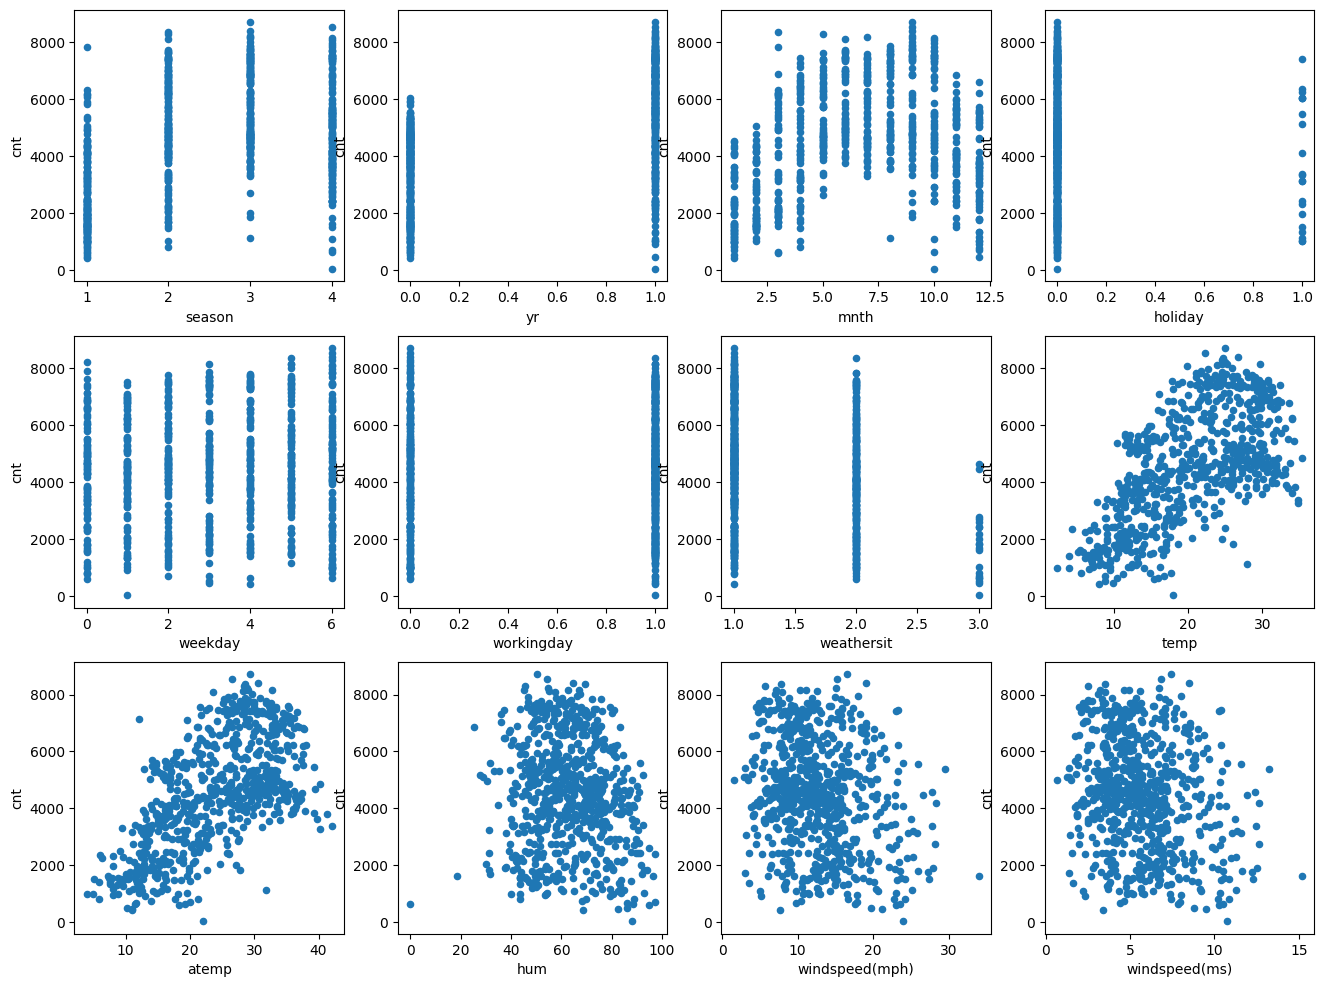

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?

ответ: До середины года - прямая зависимость;после середины - обратная

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ: Это погода и как погода ощущается

## 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ : меньше всего коррелирует с weekday,holiday,workday,hum;
больше всего коррелирует с atemp, temp

<Axes: >

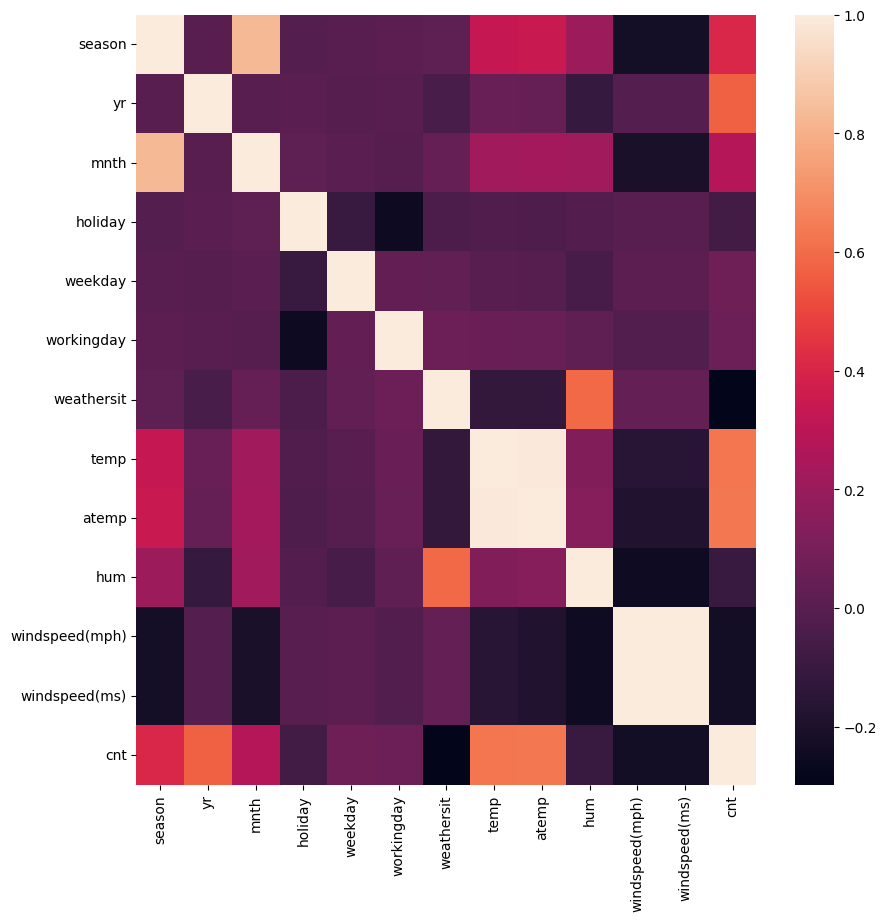

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),)

## 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: Могу предположить, что скорее всего это связано с малым количеством данных годов

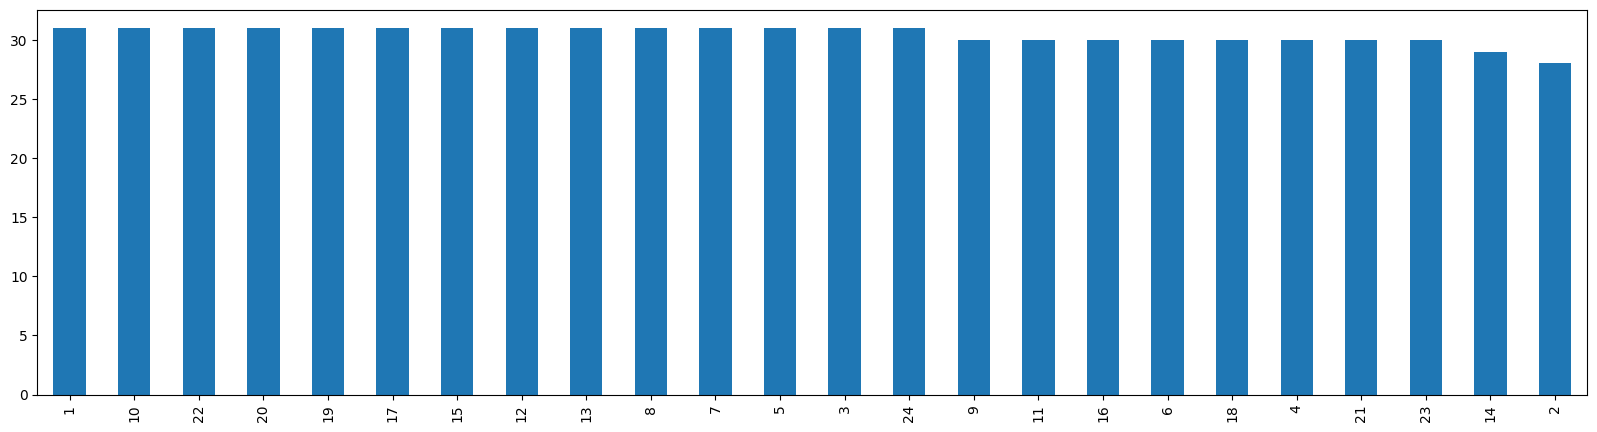

In [ ]:
plt.figure(figsize=(20, 5))
df.loc[df['yr'] == 1, 'mnth'] += 12
df['mnth'].value_counts().plot.bar()
df.loc[df['yr'] == 1, 'mnth'] -= 12
plt.show()

## 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: Предполагаю, что данные собирались с целью проведения анализа зависимости арендованных велосипедов от определенных факторов.

Ответ: равномерное распределение, т.к. сумма количества одного признака находится в отрезке от 104 до 105; сам признак принадлежит отрезку от 0 до 6

<Axes: xlabel='weekday', ylabel='count'>

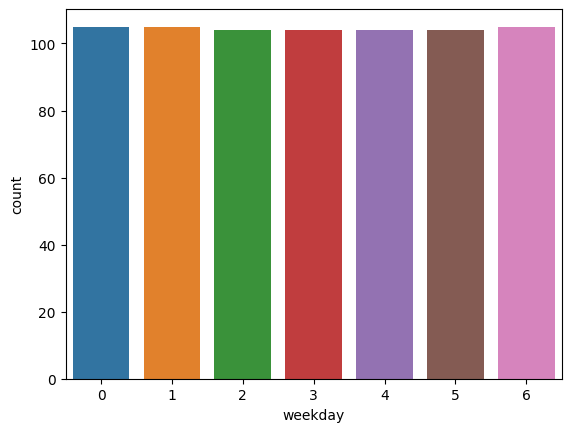

In [ ]:
sns.countplot(data=df,x= 'weekday')

<Axes: xlabel='weathersit', ylabel='count'>

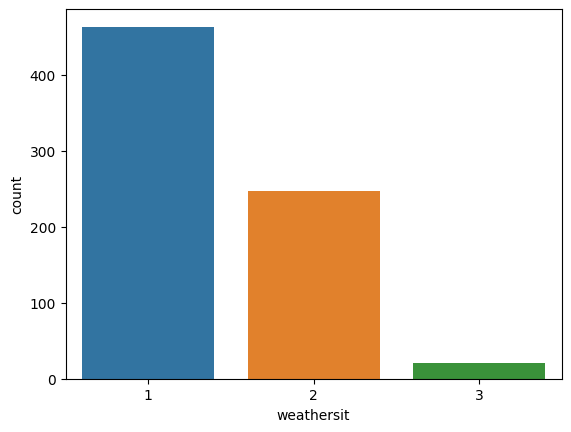

In [ ]:
sns.countplot(data=df,x= 'weathersit')

## 5. Распределение

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: Приблизительно 4500

Ответ: Нормальное распределение

<Axes: xlabel='cnt', ylabel='Density'>

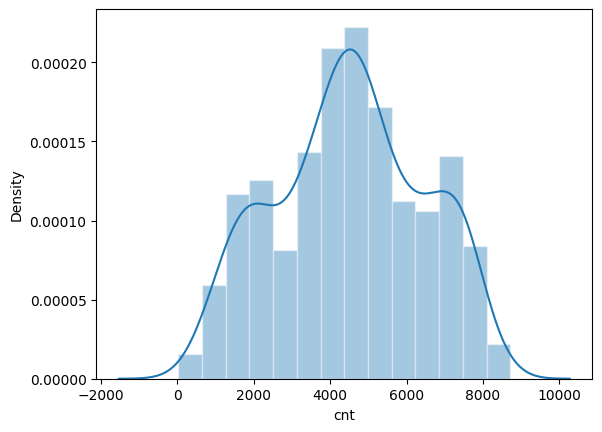

In [ ]:
sns.histplot(
    df['cnt'], kde=True,
    stat='density', kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4)
)

## 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: Нет, т.к. наблюдается линейная зависимость температуры и ощущаймой температуры, также с учётом показаний кореляции в heatpam наблюдалось его высокое значение. На графике ниже мы наблюдаем, что присутствует отклонение, но скорее всего это оштбочно, т.к. скорее всего приблизительно при 29 градусах вряд ли будет ощущаться приблизительно как 13 градусов

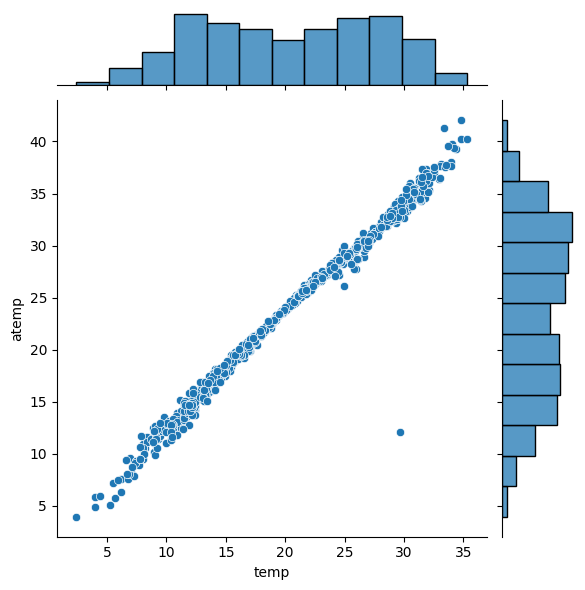

In [ ]:
sns.jointplot(x='temp', y='atemp', data=df)

## 7. Ящик с усами

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ: Стоит отметить, что могут влиять различные факторы, которые не учитываются в имеющихся данных. С учетом имеющихся данных, можно предположить что это связано с тем, что в январе больше нерабочих дней; в апреле вероятнее всего связано с уходом зимы и началом благоприятной погоды ;в июле-летний месяц, в выходые хорошая летняя погода и время проводят на улице.

<Axes: xlabel='mnth', ylabel='workingday'>

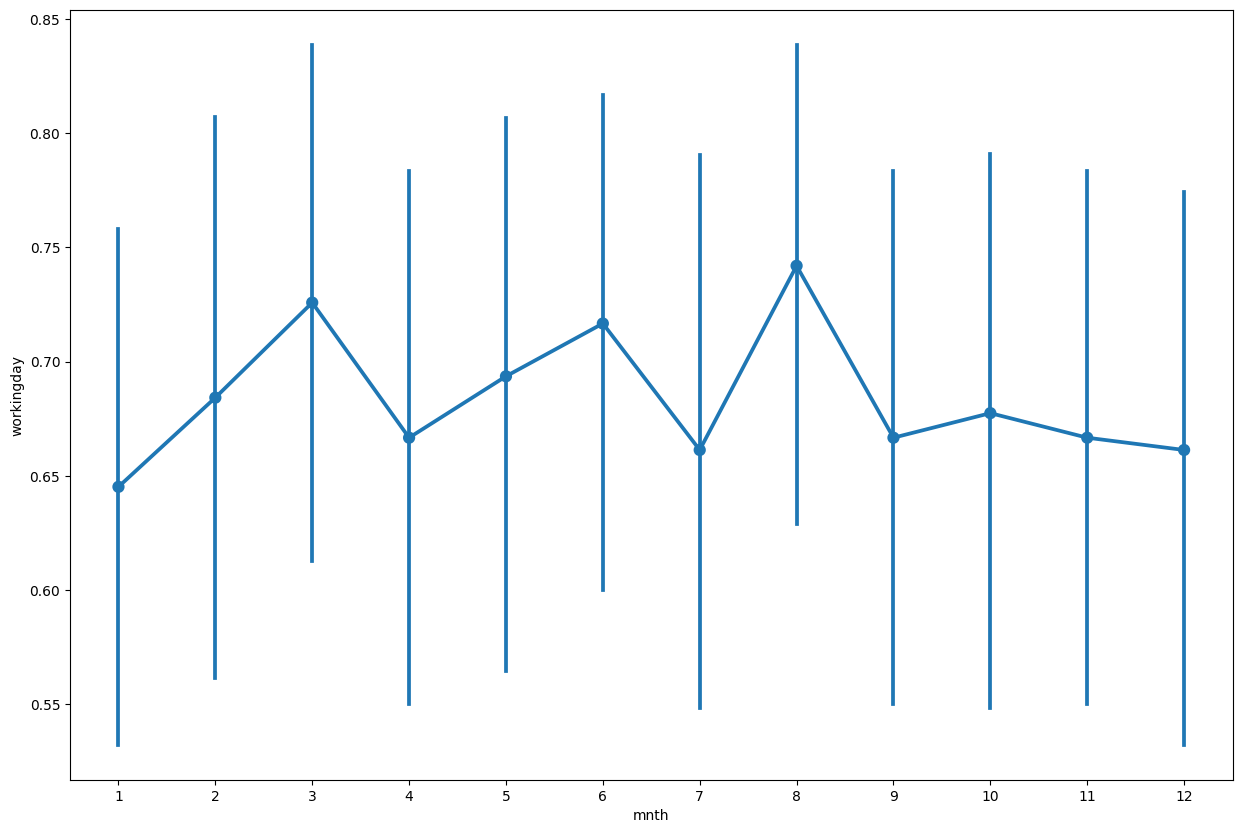

In [ ]:
plt.figure(figsize=(15,10))
sns.pointplot(x='mnth', y='workingday', data=df)

<Axes: xlabel='mnth', ylabel='workingday'>

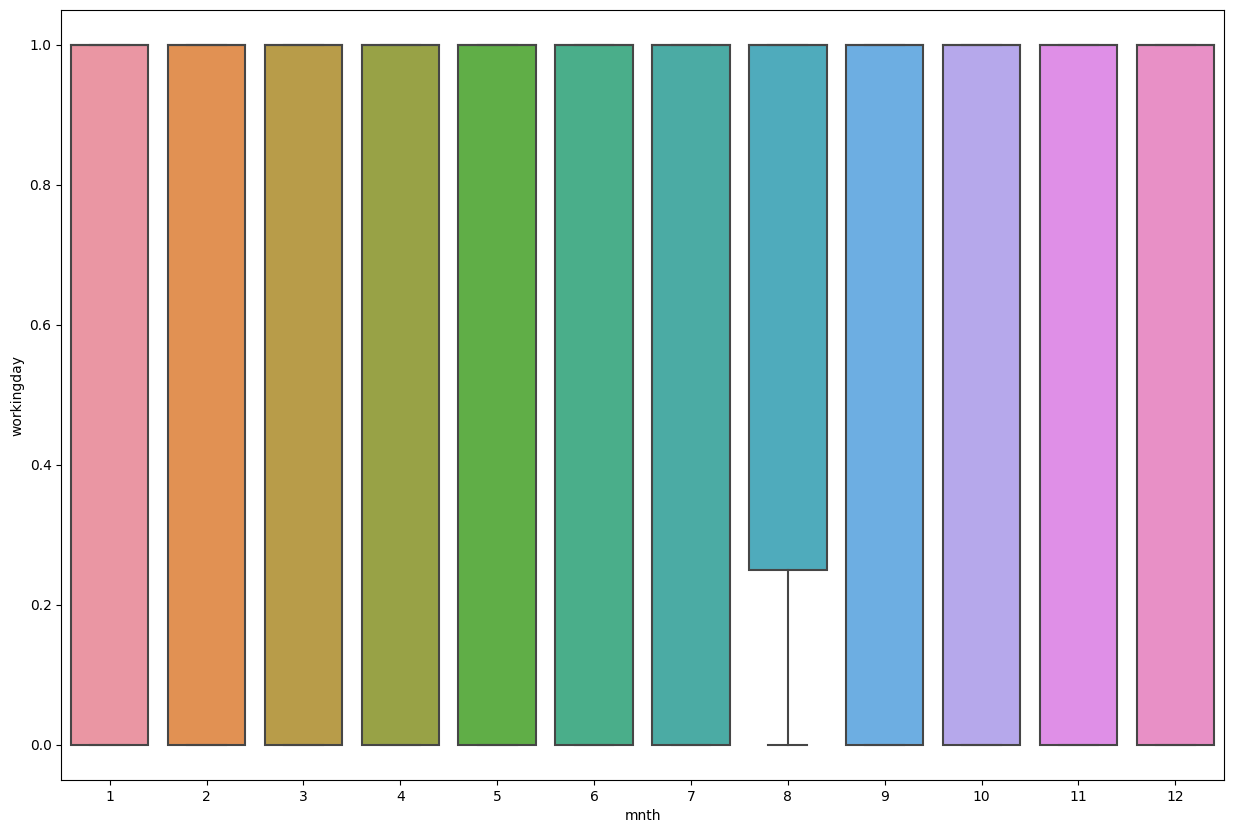

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x='mnth', y='workingday', data=df)

## 8. Хитрый вопрос

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение: создадим новый признак, которую получим путём вычетания колонки ощущаемой температуры из колонки реальной температуры. Если ощущаемая температура меньше чем реальная, то значения нового признака будет отрицательным (графически можно увидеть количество отрицательных значений). Рассмотрев значения по двум осям на нашем новом графике, видно что почти все точки, кроме нескольких, находятся выше 0 по оси нового признака (Из данного признака следует, что от сильного ветра на улице холоднее не ощущается)

<Axes: xlabel='windspeed(ms)', ylabel='новый признак'>

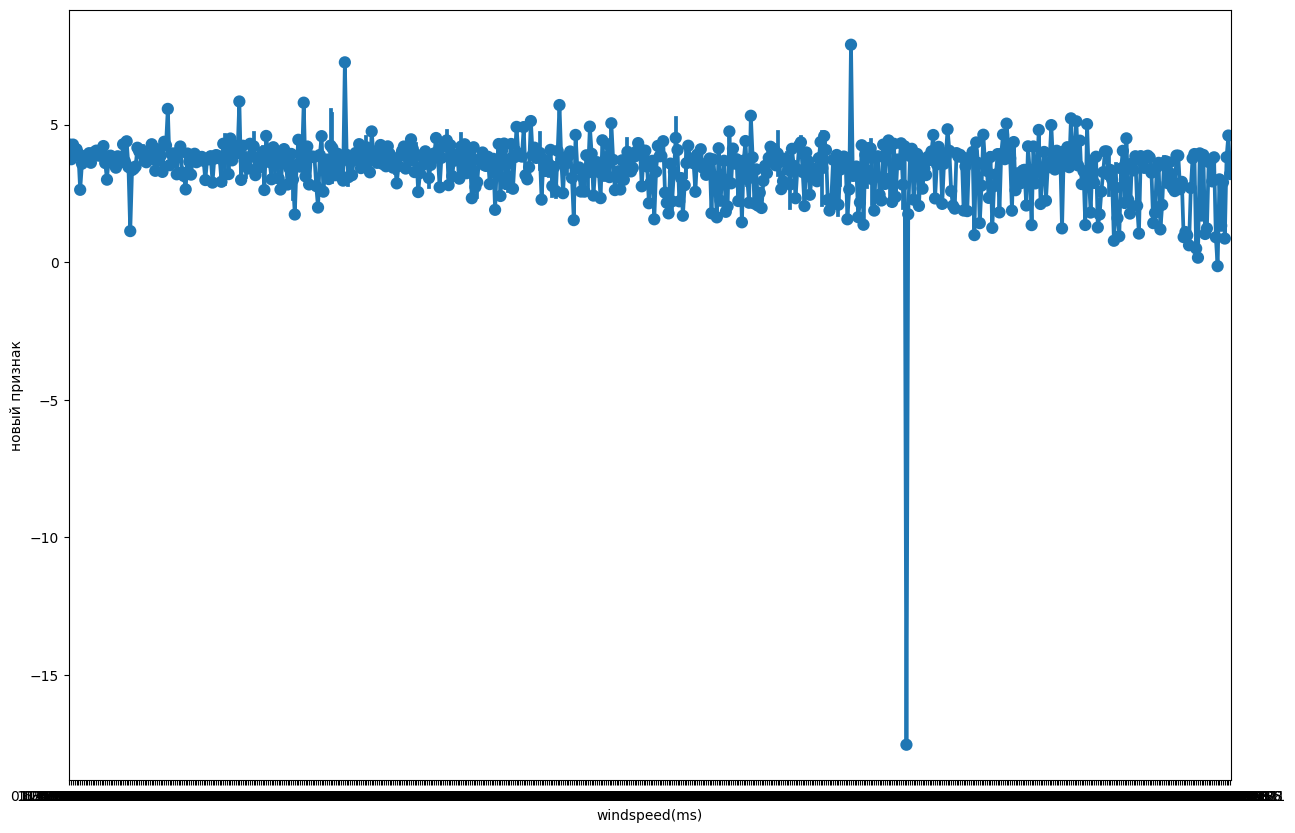

In [ ]:
value = np.array(df['atemp']) - np.array(df['temp'])
se = pd.Series(value)
df['новый признак'] = se.values
plt.figure(figsize=(15,10))
sns.pointplot(x='windspeed(ms)', y='новый признак', data=df)